
## Errors

Types of errors:

1.  Edge of grid errors
2. Finite difference discretization error
3. Floating point round\-off error
4. Finite difference truncation error
### Schwarzschild Example

In [1]:
%plot gnuplot

% Make low res schwarzschild metric
gridSizeL = [1 20 5 5];
gridScalingL = [1 1 1 1];
worldCenterL = (gridSizeL+1)./2.*gridScalingL;
rsL = 0.0001;
LowResSchwarzschild = metricGet_Schwarzschild(gridSizeL,worldCenterL,rsL,gridScalingL);

% Make high res schwarzschild metric
gridSizeH = [1 2000 5 5];
gridScalingH = [1 0.01 0.01 0.01];
worldCenterH = (gridSizeH+1)./2.*gridScalingH;
rsH = 0.0001;
HighResSchwarzschild = metricGet_Schwarzschild(gridSizeH,worldCenterH,rsH,gridScalingH);

% Make second order high res schwarzschild metric
gridSizeS = [1 2000 5 5];
gridScalingS = [1 0.01 0.01 0.01];
worldCenterS = (gridSizeS+1)./2.*gridScalingS;
rsS = 0.0001;
SecondSchwarzschild = metricGet_Schwarzschild(gridSizeS,worldCenterS,rsS,gridScalingS);

% Compute Energy Tensors
LowResEnergy = getEnergyTensor(LowResSchwarzschild);
HighResEnergy = getEnergyTensor(HighResSchwarzschild);
SecondEnergy = getEnergyTensor(SecondSchwarzschild,0,'second');

#### Plot Energy Tensors


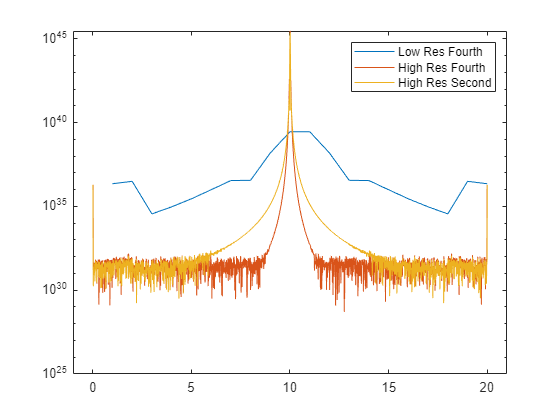

In [2]:
hold off
plotq((1:gridSizeL(2)).*gridScalingL(2),abs(LowResEnergy.tensor{1,1}(1, :, round(worldCenterL(3)/gridScalingL(3)), round(worldCenterL(4)/gridScalingL(4)))))
hold on
plotq((1:gridSizeH(2)).*gridScalingH(2),abs(HighResEnergy.tensor{1,1}(1, :, round(worldCenterH(3)/gridScalingH(3)), round(worldCenterH(4)/gridScalingH(4)))))
plotq((1:gridSizeS(2)).*gridScalingS(2),abs(SecondEnergy.tensor{1,1}(1, :, round(worldCenterS(3)/gridScalingS(3)), round(worldCenterS(4)/gridScalingS(4)))))
set(gca,'YScale','log')
xlim([-1 21])
legend('Low Res Fourth','High Res Fourth','High Res Second')


All 4 types of errors can be seen on this one plot.


The Schwarzschild metric acts well to highlight the different types of numerical error of the code since, schwarzschild radius, the evaluated energy density shold be 0. Therefore, any computed non\-zero energy density is due to some type of error.

### Edge of Grid Error

The first, and perhaps most important error from a practical standpoint is edge of grid error. The energy tensor is returned in the same grid size as the input metric. At the edges of the world, a full finite difference cannot be taken as the points needed to evaluate to derivatives at the edges are outside of the world. This can be seen in the edsges of the plot where, all three evaluations have considerable energy density spikes at the very bounds of the space.


For energy tensor and energy condition plotting, it is recommended to exclude a boundary of 2 grid points at the edges of the space.

### Finite Difference Discretization Error

This type of error occurs when the rate of change of the metric components nears or exceeds the grid resolution. The error is a direct function of grid resolution. As can be seen in the plot, the blue low resolution line has more more error over a wider area than the higher resolution orange line. Even with high resolution though, the orange line does exhibit this type of error as it nears the center of the Schwarzschild metric. Metrics with sharp transitions can lead to these finite difference edge effects and may give energy/violation that wouldn't actually exist at those boundaries.

### Floating Point Round Off Error

For double value precision, there is a maximum dynamic range of numbers that can be stored. As can be seen in the plot, the errors become very noisy around 10^32. The double precision limit prohibits storing more discreate values. This precision limit is based on the maximum value that exists in the array that is storing the values.

### Finite Difference Truncation Error

This error result from the finite difference not taking a perfect derivative of the function. The order of the finite difference(second, fourth, etc.) dictate how accurate the real derivative is evaluated. As can be seen of the plot, the yellow second order finite difference has higher errors than the orange fourth order finite difference.

